<a href="https://www.kaggle.com/code/saroshfarhan1/hull-tactical-market-prediction?scriptVersionId=273397473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/saroshfarhan1/hull-tactical-market-prediction?scriptVersionId=270036248" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hull-tactical-market-prediction/train.csv
/kaggle/input/hull-tactical-market-prediction/test.csv
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_inference_server.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/templates.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/base_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/relay.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2_grpc.py
/kaggl

In [2]:
train_df =  pd.read_csv("/kaggle/input/hull-tactical-market-prediction/train.csv")
test_df = pd.read_csv("/kaggle/input/hull-tactical-market-prediction/test.csv")

In [3]:
## Local
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # for local version
# train_df =  pd.read_csv("hull-tactical-market-prediction/train.csv")
# test_df = pd.read_csv("hull-tactical-market-prediction/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [5]:
train_df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [6]:
# checking for missing values
train_df.isnull().sum()

date_id                             0
D1                                  0
D2                                  0
D3                                  0
D4                                  0
                                 ... 
V8                               1006
V9                               4539
forward_returns                     0
risk_free_rate                      0
market_forward_excess_returns       0
Length: 98, dtype: int64

In [7]:
train_df.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,...,7984.000000,7984.000000,7478.000000,7984.000000,7479.000000,7984.000000,4451.000000,8990.000000,8990.000000,8990.000000
mean,4494.500000,0.031591,0.031591,0.047831,0.575195,0.190656,-0.238042,0.045717,0.142825,0.143159,...,0.489553,0.506930,0.372494,0.287179,0.148270,0.303908,0.129227,0.000469,0.000107,0.000051
std,2595.333794,0.174917,0.174917,0.213420,0.494341,0.392840,0.425909,0.208883,0.349914,0.350254,...,0.306230,0.306554,1.153280,0.312238,1.326879,0.351109,1.277273,0.010551,0.000088,0.010568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000661,0.000661,-2.723527,0.000661,-2.027551,0.000661,-1.497420,-0.039754,-0.000004,-0.040582
25%,2247.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.207011,0.236111,-0.472864,0.000661,-0.797168,0.000661,-0.738242,-0.004324,0.000008,-0.004759
50%,4494.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.492394,0.519180,0.275162,0.180225,-0.097670,0.101025,-0.170825,0.000659,0.000095,0.000252
75%,6741.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.760582,0.772487,1.125069,0.515873,0.795763,0.590030,0.685907,0.005900,0.000193,0.005479
max,8989.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6.809912,1.000000,12.678264,1.000000,12.997536,0.040661,0.000317,0.040551


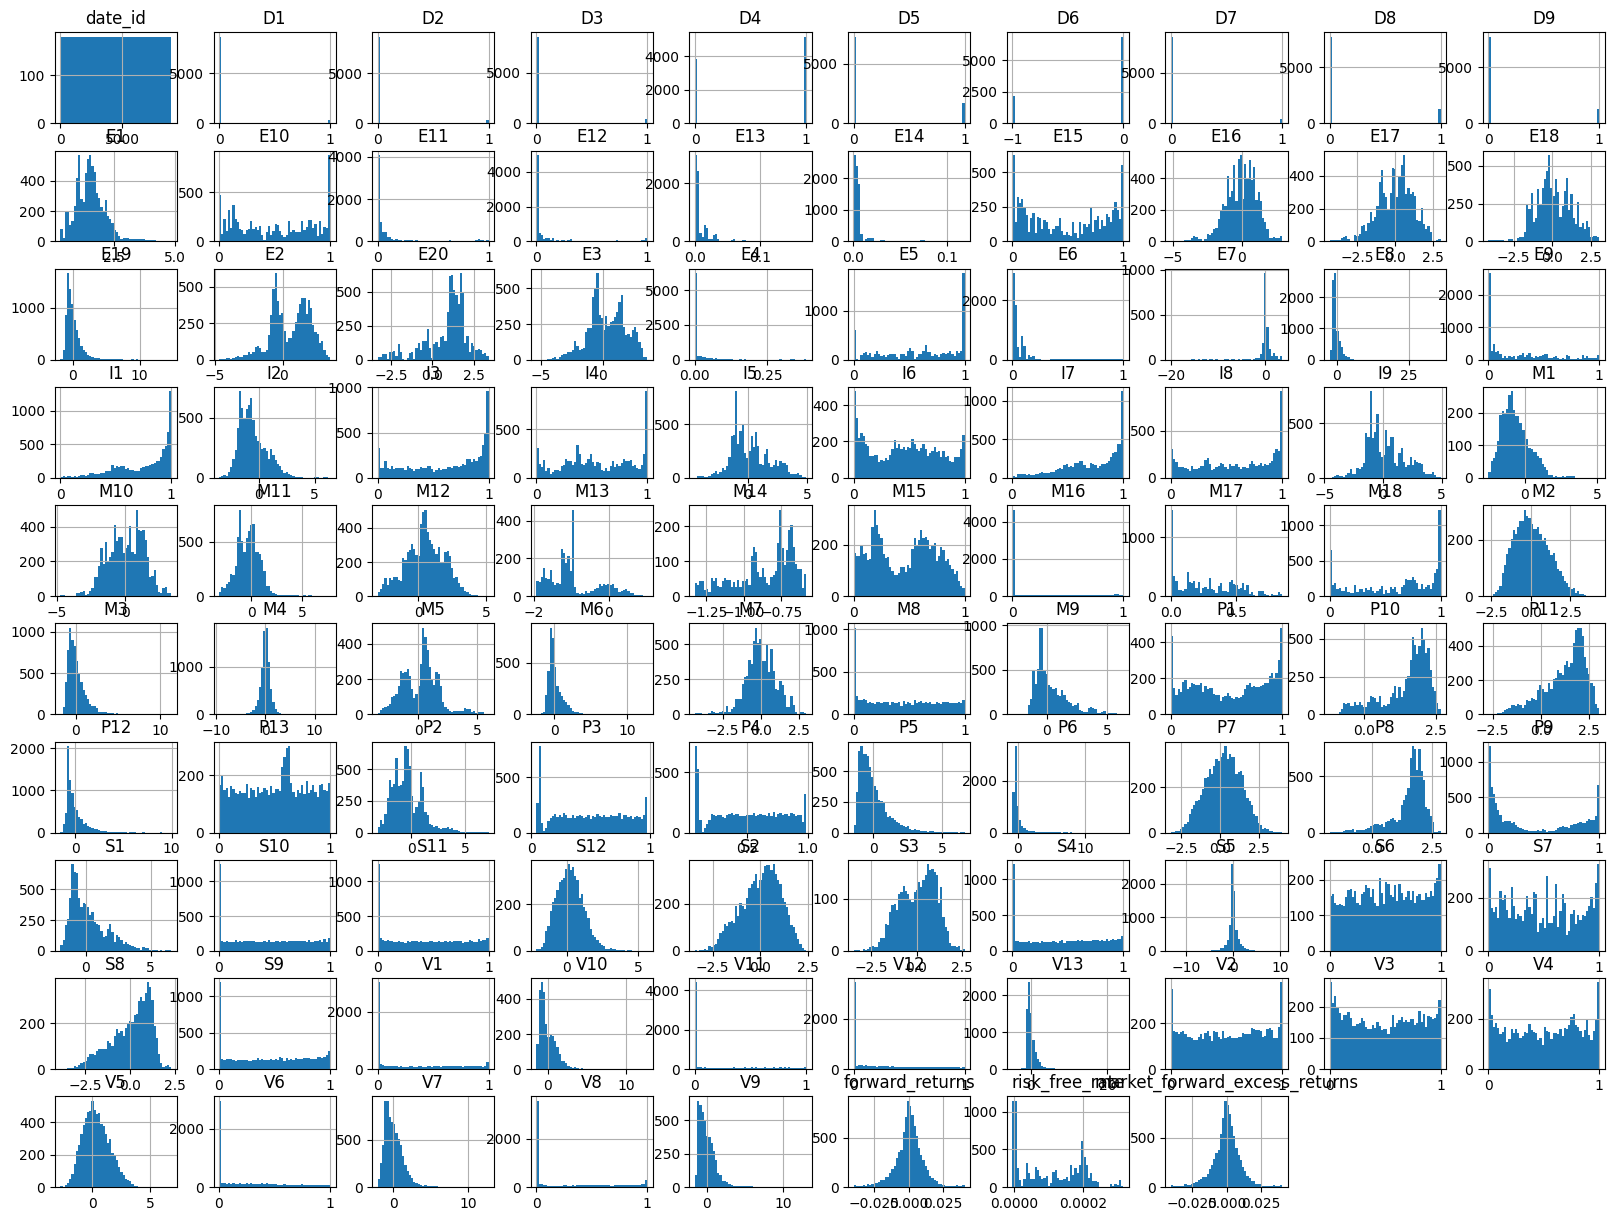

In [8]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

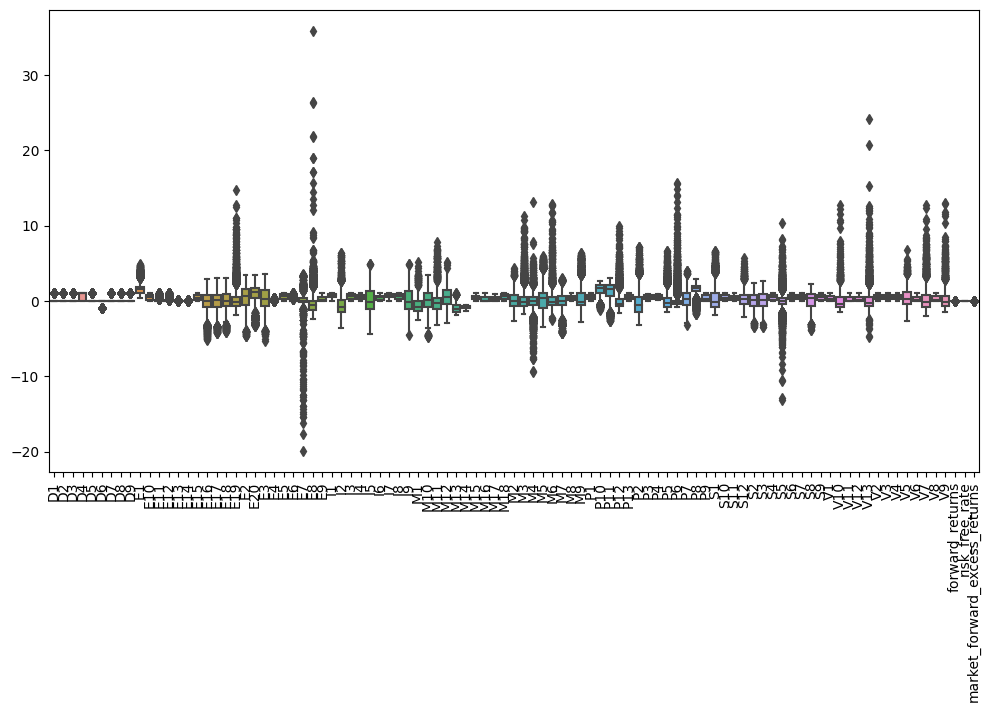

In [9]:
# remove dateid from the data
train_df_w_did = train_df.copy()
train_df_w_did = train_df_w_did.drop('date_id',axis=1)
# some more visualizations box plot for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df_w_did)
plt.xticks(rotation=90)
plt.show()

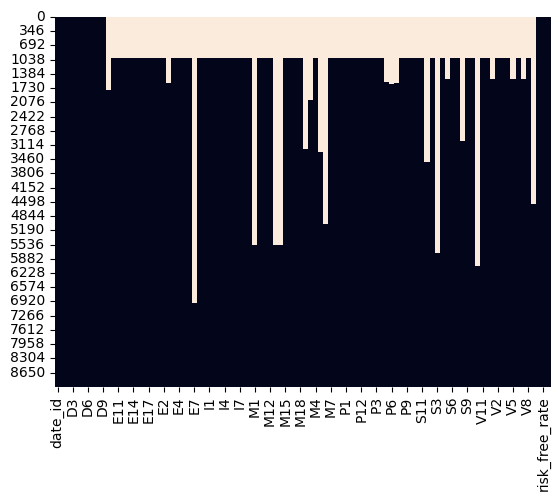

In [10]:
sns.heatmap(train_df.isna(), cbar=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


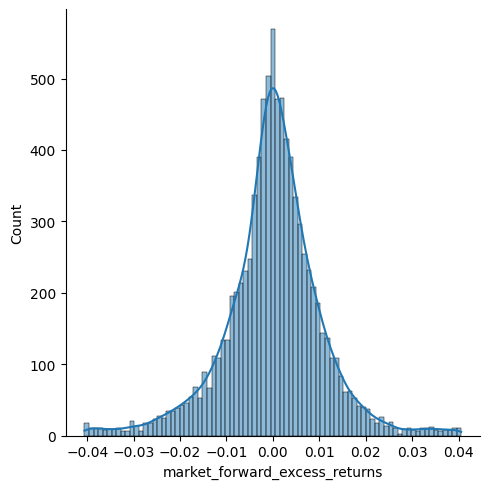

In [11]:
sns.displot(train_df['market_forward_excess_returns'], kde=True)
plt.xlabel('market_forward_excess_returns')
plt.show()

In [12]:
# looking into the correaltions of varialbles
corr = train_df_w_did.corr(numeric_only=True)

target_corr = corr['market_forward_excess_returns'].sort_values(ascending=False)
print("Top Positive Correlations:\n", target_corr.head(10))
print("\nTop Negative Correlations:\n", target_corr.tail(10))

Top Positive Correlations:
 market_forward_excess_returns    1.000000
forward_returns                  0.999957
V13                              0.062418
M1                               0.046339
S5                               0.040106
D2                               0.034185
D1                               0.034185
M2                               0.033312
V10                              0.032735
V7                               0.031510
Name: market_forward_excess_returns, dtype: float64

Top Negative Correlations:
 P12   -0.022873
P5    -0.022949
M12   -0.024548
I2    -0.025513
P8    -0.029731
E12   -0.030843
E11   -0.032040
E7    -0.032476
S2    -0.037738
M4    -0.066454
Name: market_forward_excess_returns, dtype: float64


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


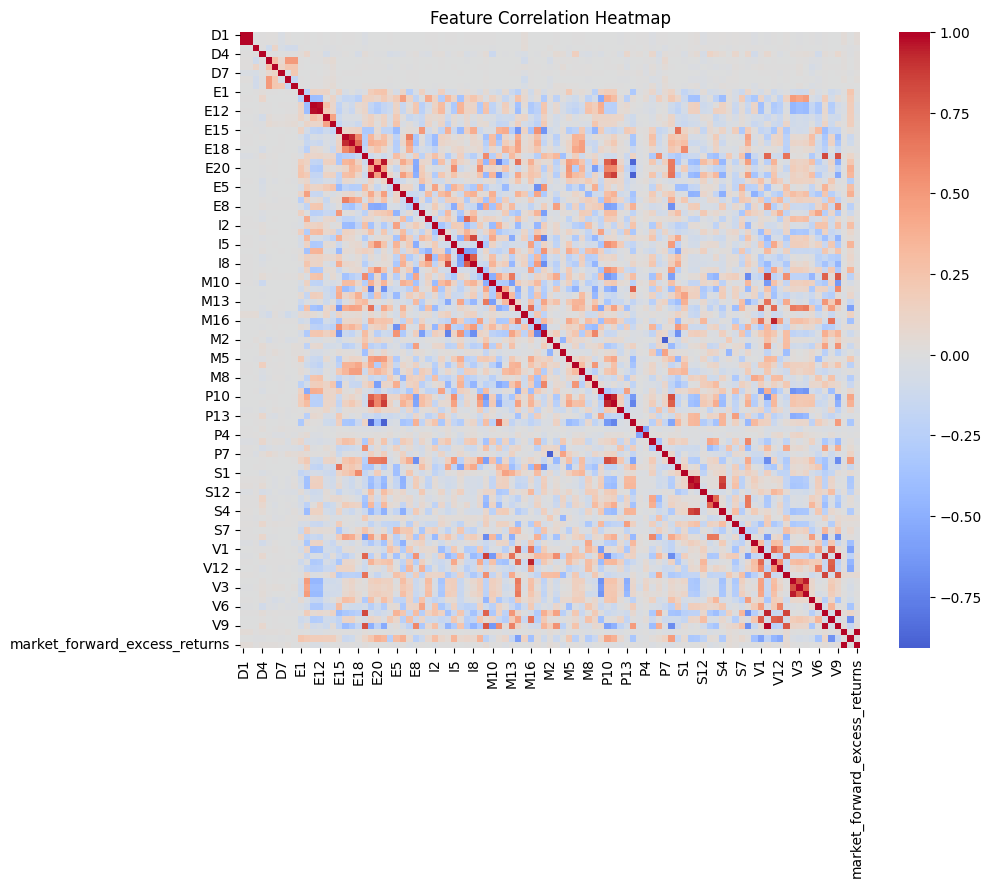

In [13]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show();

In [14]:
import os

import pandas as pd
import polars as pl
from pathlib import Path

Model 1 - Trying my luck by atleast starting with something.

In [15]:
import kaggle_evaluation.default_inference_server


DATA_PATH: Path = Path('/kaggle/input/hull-tactical-market-prediction/')

_true_train_df = pl.read_csv(DATA_PATH / "train.csv").select(["date_id", "forward_returns"])

true_targets = {
    int(d): float(v)
    for d, v in zip(
        _true_train_df["date_id"].to_numpy(),
        _true_train_df["forward_returns"].to_numpy()
    )
}


def predict(test: pl.DataFrame) -> float:
    date_id = int(test.select("date_id").to_series().item())
    t = true_targets.get(date_id, None)    
    return 0.09 if t > 0 else 0.0


inference_server = kaggle_evaluation.default_inference_server.DefaultInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(('/kaggle/input/hull-tactical-market-prediction/',))

In [16]:
import os
from pathlib import Path
import datetime

from tqdm import tqdm
from dataclasses import dataclass, asdict

import polars as pl 
import numpy as np
from sklearn.linear_model import ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler

import kaggle_evaluation.default_inference_server

In [17]:
train = pl.read_csv("/kaggle/input/hull-tactical-market-prediction/train.csv")
test = pl.read_csv("/kaggle/input/hull-tactical-market-prediction/test.csv")

In [18]:
# ============ RETURNS TO SIGNAL CONFIGS ============
MIN_SIGNAL: float = 0.0                         # Minimum value for the daily signal 
MAX_SIGNAL: float = 2.0                         # Maximum value for the daily signal 
SIGNAL_MULTIPLIER: float = 400.0                # Multiplier of the OLS market forward excess returns predictions to signal 

# ============ MODEL CONFIGS ============
CV: int = 10                                    # Number of cross validation folds in the model fitting
L1_RATIO: float = 0.5                           # ElasticNet mixing parameter
ALPHAS: np.ndarray = np.logspace(-4, 2, 100)    # Constant that multiplies the penalty terms
MAX_ITER: int = 1000000   
@dataclass(frozen=True)
class RetToSignalParameters:
    signal_multiplier: float 
    min_signal : float = MIN_SIGNAL
    max_signal : float = MAX_SIGNAL
ret_signal_params = RetToSignalParameters(
    signal_multiplier= SIGNAL_MULTIPLIER
)
# The maximum number of iterations
def convert_ret_to_signal(
    ret_arr: np.ndarray,
    params: RetToSignalParameters
) -> np.ndarray:
    """
    Converts raw model predictions (expected returns) into a trading signal.

    Args:
        ret_arr (np.ndarray): The array of predicted returns.
        params (RetToSignalParameters): Parameters for scaling and clipping the signal.

    Returns:
        np.ndarray: The resulting trading signal, clipped between min and max values.
    """
    return np.clip(
        ret_arr * params.signal_multiplier + 1, params.min_signal, params.max_signal
    )

In [19]:
def predict(test: pl.DataFrame) -> float:
    global train
    test = test.rename({'lagged_forward_returns':'target'})
    date_id = test.select("date_id").to_series()[0]
    print(date_id)
    raw_pred: float = train.filter(pl.col("date_id") == date_id).select(["market_forward_excess_returns"]).to_series()[0]
    return convert_ret_to_signal(raw_pred, ret_signal_params)

In [20]:
inference_server = kaggle_evaluation.default_inference_server.DefaultInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(('/kaggle/input/hull-tactical-market-prediction/',))

8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
